In [19]:
import numpy as np
from scipy.integrate import quad
from sympy import symbols, sin, cosh, sinh, pi, lambdify, diff
import matplotlib.pyplot as plt


In [12]:


x = symbols('x')

def phi1(i, x):
    return x**i * (x - 1)

def phi1_prime(i, x):
    return diff(phi1(i, x), x)
def calcA_phi1(n):
    A = np.zeros((n, n))
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            integrand = lambdify(x, phi1_prime(i, x) * phi1_prime(j, x) + phi1(i, x) * phi1(j, x))
            A[i - 1, j - 1] = quad(integrand, 0, 1)[0]
    return A

def calcF_phi1(n):
    f = np.zeros(n)
    for j in range(1, n + 1):
        integrand = lambdify(x, x * phi1(j, x))
        f[j - 1] = quad(integrand, 0, 1)[0]
    return f

def solveGalerkin(n):
    A = calcA_phi1(n)
    f = calcF_phi1(n)
    w = np.linalg.solve(A, f)
    return w
sol1 = solveGalerkin(1)
sol2 = solveGalerkin(2)
sol3 = solveGalerkin(3)


Solução para n=1: [-0.22727273]
Solução para n=2: [-0.14587738 -0.1627907 ]
Solução para n=3: [-0.14964836 -0.14405742 -0.01873327]


In [17]:


x = symbols('x')

def phi2(i, x):
    return sin(i * pi * x)

def phi2_prime(i, x):
    return diff(phi2(i, x), x)

def calcA_phi2(n):
    A = np.zeros((n, n))
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            if i == j:
                A[i - 1, j - 1] = (i * pi)**2 / 2 + 1 / 2
            else:
                A[i - 1, j - 1] = 0
    return A

def calcF_phi2(n):
    f = np.zeros(n)
    for j in range(1, n + 1):
        integrand = lambdify(x, x * phi2(j, x))
        f[j - 1] = quad(integrand, 0, 1)[0]
    return f

def solveGalerkin(n):
    A = calcA_phi2(n)
    f = calcF_phi2(n)
    w = np.linalg.solve(A, f)
    return w

sol1 = solveGalerkin(1)
sol2 = solveGalerkin(2)
sol3 = solveGalerkin(3)


Solução para n=1: [0.05856881]
Solução para n=2: [ 0.05856881 -0.00786369]
Solução para n=3: [ 0.05856881 -0.00786369  0.00236241]


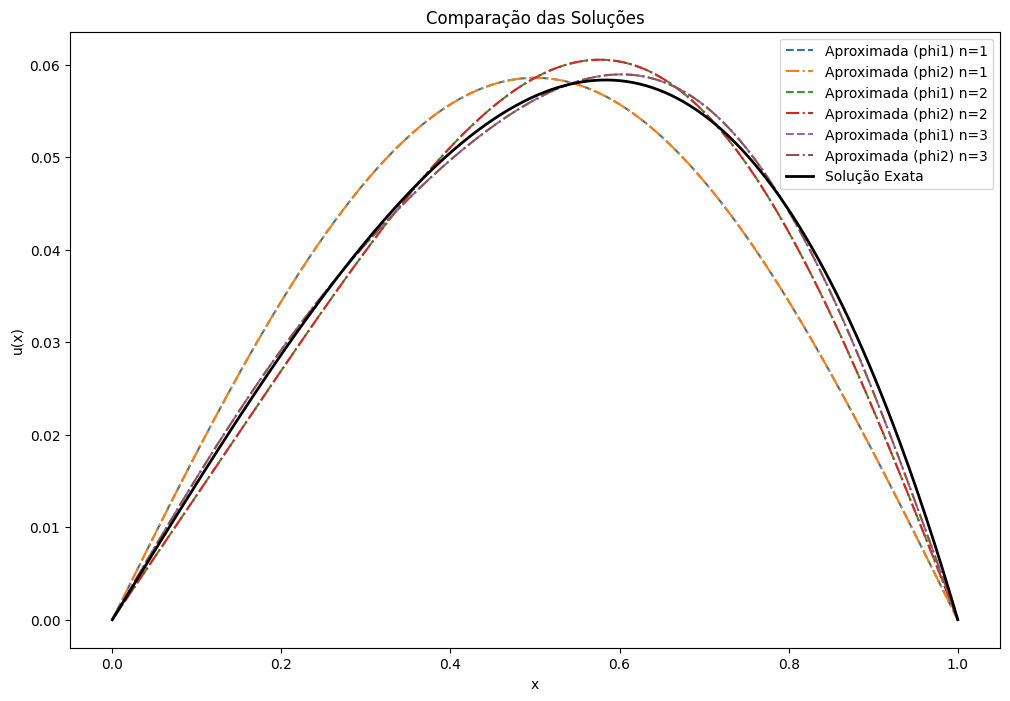

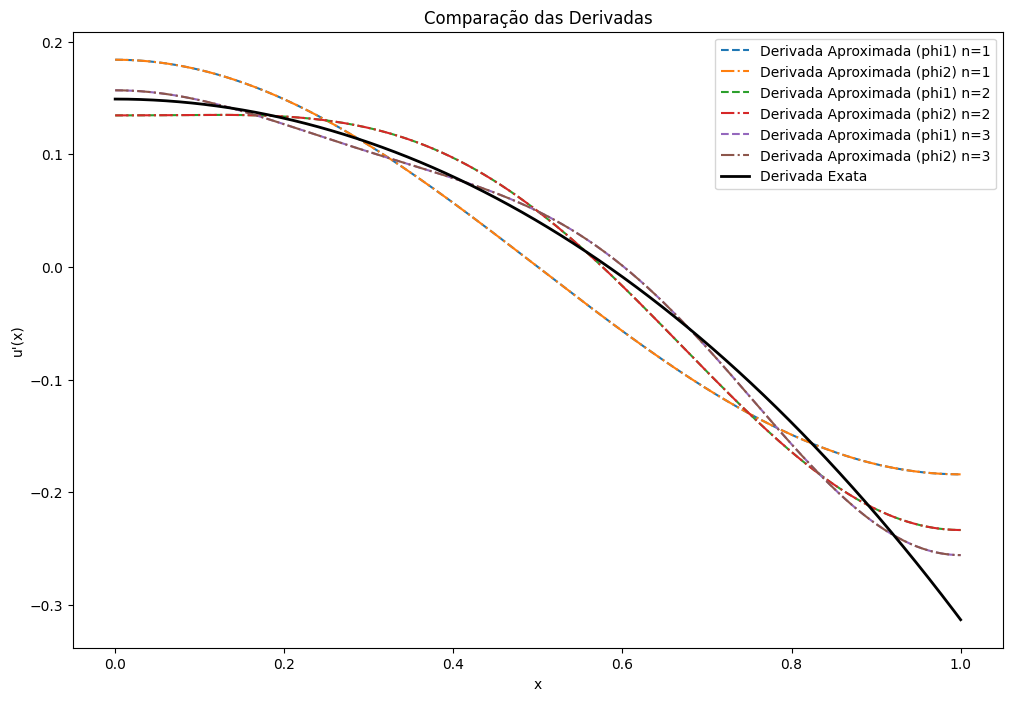

In [23]:
u_e = x - sinh(x) / sinh(1)
u_e_prime = diff(u_e, x)

def solveGalerkin_phi1(n):
    A = calcA_phi1(n)
    f = calcF_phi1(n)
    w = np.linalg.solve(A, f)
    return w

def solveGalerkin_phi2(n):
    A = calcA_phi2(n)
    f = calcF_phi2(n)
    w = np.linalg.solve(A, f)
    return w

def cfu_phi1(n, x_val):
    w = solveGalerkin_phi1(n)
    u_h = sum(w[i - 1] * phi1(i, x_val) for i in range(1, n + 1))
    return u_h

def cfu_phi2(n, x_val):
    w = solveGalerkin_phi2(n)
    u_h = sum(w[i - 1] * phi2(i, x_val) for i in range(1, n + 1))
    return u_h

def cfu_prime_phi1(n, x_val):
    w = solveGalerkin_phi1(n)
    u_h_prime = sum(w[i - 1] * lambdify(x, phi1_prime(i, x))(x_val) for i in range(1, n + 1))
    return u_h_prime

def cfu_prime_phi2(n, x_val):
    w = solveGalerkin_phi2(n)
    u_h_prime = sum(w[i - 1] * lambdify(x, phi2_prime(i, x))(x_val) for i in range(1, n + 1))
    return u_h_prime

x_vals = np.linspace(0, 1, 400)
u_e_vals = [u_e.evalf(subs={x: val}) for val in x_vals]

plt.figure(figsize=(12, 8))

for n in [1, 2, 3]:
    u_vals_phi1 = [cfu_phi1(n, val) for val in x_vals]
    u_vals_phi2 = [cfu_phi2(n, val) for val in x_vals]

    plt.plot(x_vals, u_vals_phi1, linestyle='--', label=f'Aproximada (phi1) n={n}')
    plt.plot(x_vals, u_vals_phi2, linestyle='-.', label=f'Aproximada (phi2) n={n}')

plt.plot(x_vals, u_e_vals, label='Solução Exata', color='black', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparação das Soluções')
plt.show()

plt.figure(figsize=(12, 8))

u_e_prime_vals = [u_e_prime.evalf(subs={x: val}) for val in x_vals]

for n in [1, 2, 3]:
    u_prime_vals_phi1 = [cfu_prime_phi1(n, val) for val in x_vals]
    u_prime_vals_phi2 = [cfu_prime_phi2(n, val) for val in x_vals]

    plt.plot(x_vals, u_prime_vals_phi1, linestyle='--', label=f'Derivada Aproximada (phi1) n={n}')
    plt.plot(x_vals, u_prime_vals_phi2, linestyle='-.', label=f'Derivada Aproximada (phi2) n={n}')

plt.plot(x_vals, u_e_prime_vals, label='Derivada Exata', color='black', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel("u'(x)")
plt.title("Comparação das Derivadas")
plt.show()

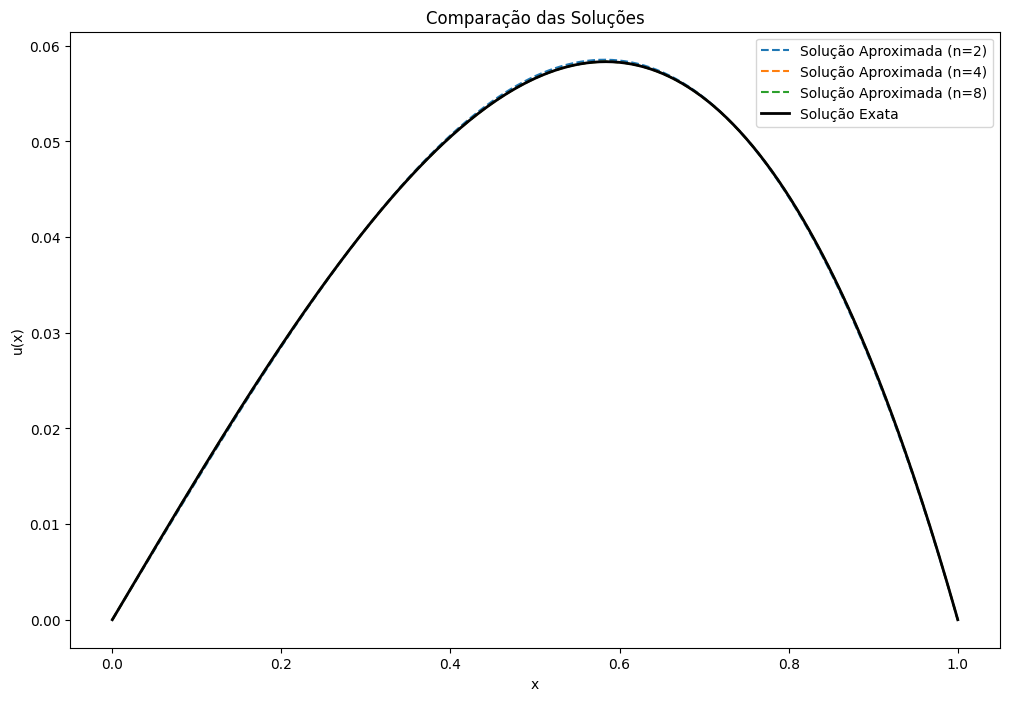

In [24]:
# Exercicio 4

# Definição das variáveis simbólicas
x = symbols('x')

# Solução exata
u_e = x - sinh(x) / sinh(1)

# Funções para calcular os coeficientes da matriz A e do vetor f
def calc_a_ij(i, j):
    term1 = i * j / (i + j - 1)
    term2 = ((1 + i) * j + (1 + j) * i) / (i + j)
    term3 = (1 + (1 + i) * (1 + j)) / (i + j + 1)
    term4 = 2 / (i + j + 2)
    term5 = 1 / (i + j + 3)
    return term1 - term2 + term3 - term4 + term5

def calc_f_i(i):
    return 1 / (i + 3) - 1 / (i + 2)

# Montar a matriz A e o vetor f
def montar_A_f(n):
    A = np.zeros((n, n))
    f = np.zeros(n)
    for i in range(1, n + 1):
        f[i - 1] = calc_f_i(i)
        for j in range(1, n + 1):
            A[i - 1, j - 1] = calc_a_ij(i, j)
    return A, f

# Resolver o sistema
def solve_galerkin(n):
    A, f = montar_A_f(n)
    w = np.linalg.solve(A, f)
    return w

# Construir a solução aproximada
def construct_u_h(n, x_val):
    w = solve_galerkin(n)
    u_h = sum(w[i - 1] * (x_val ** i) * (x_val - 1) for i in range(1, n + 1))
    return u_h

# Valores de x para o gráfico
x_vals = np.linspace(0, 1, 400)
u_e_vals = [u_e.evalf(subs={x: val}) for val in x_vals]

# Plotar as soluções exatas e aproximadas para n=2, 4, 8
plt.figure(figsize=(12, 8))

for n in [2, 4, 8]:
    u_h_vals = [construct_u_h(n, val) for val in x_vals]
    plt.plot(x_vals, u_h_vals, linestyle='--', label=f'Solução Aproximada (n={n})')

plt.plot(x_vals, u_e_vals, label='Solução Exata', color='black', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparação das Soluções')
plt.show()